In [1]:
from nnga.inference.predictor import Predictor
from nnga.utils.data_io import load_image
from nnga.utils.data_manipulation import adjust_image_shape

from matplotlib import pyplot as plt
import cv2

nnga_dir = "C:/Users/RafaelDelLama/Documents/GitHub/nnga" # Set the nnga path here

In [2]:
model_dir = nnga_dir + "/NNGA_output/segmentation_lung"
test_img = nnga_dir + "/tests/testdata/datasets/segmentation/lung/image/MCUCXR_0048_0.png"

nnga_predictor = Predictor(model_dir)

In [3]:
img = load_image(test_img)

In [4]:
pred, _ = nnga_predictor.predict([img])
print(f"pred: {pred}\n\n")

pred_proba, _ = nnga_predictor.predict_proba([img])
print(f"pred: {pred_proba}")

pred: [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


pred: [[[[5.1881984e-02]
   [2.1048909e-02]
   [1.0061446e-02]
   ...
   [8.0914032e-03]
   [2.3235712e-02]
   [4.6321388e-02]]

  [[8.5448725e-03]
   [2.1501204e-03]
   [1.2791851e-03]
   ...
   [1.4387837e-04]
   [8.4671011e-04]
   [5.9748334e-03]]

  [[4.8908629e-03]
   [9.5957139e-04]
   [5.8291224e-04]
   ...
   [1.6284881e-05]
   [1.7065622e-04]
   [1.2251053e-03]]

  ...

  [[1.4356960e-01]
   [6.0509685e-02]
   [4.0076766e-02]
   ...
   [4.1131292e-02]
   [6.6304468e-02]
   [1.3134150e-01]]

  [[2.0617555e-01]
   [9.9027947e-02]
   [6.5770388e-02]
   ...
   [7.9850949e-02]
   [1.1529623e-01]
   [1.8454182e-01]]

  [[3.0751789e-01]
   [2.0005915e-01]
   [1.4060785e-01]
   ...
   [1.5348050e-01]
   [2.0109329e-01]
   [2.7852723e-01]]]]


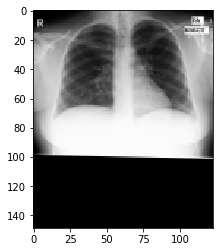

In [5]:
plt.imshow(img)

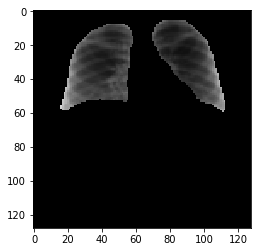

In [6]:
img = adjust_image_shape(img, (pred[0].shape[0], pred[0].shape[1], img.shape[2]))
plt.imshow(cv2.bitwise_and(img, img, mask=pred[0]), cmap=plt.cm.binary)